

# Analizando las calificaciones de las peliculas: Analisis Estadistico, Visualizando resultados y obteniendo predicciones.


### En este proyecto vamos a continuar analizando recomendaciones de peliculas, pero esta vez vamos a usar estadistica para programar manualmente con pytho la regresion linear y ver como de dispersas estan las recomendaciones de la prediccion que nosotros vamos a hacer. De esta manera podemos obtener la precision de nuestras predicciones de manera visual.

- slope, intercept, r_value, p_value, stderr

In [1]:
import pandas as pd

movies = pd.read_csv("fandango_score_comparison.csv")
print(movies.head(3))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0            

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

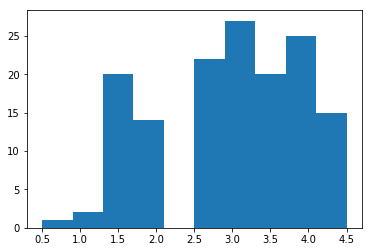

In [3]:
plt.hist(movies["Metacritic_norm_round"])
plt.show()

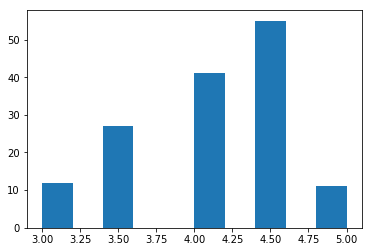

In [4]:
plt.hist(movies["Fandango_Stars"])
plt.show()



- Como podemos ver, hay una gran diferencia entre los ratings de Fandango y Metacritic. Metacritic como podemos observar tiene muchas mas reviews con una puntuacion mas alta de 3 que Fandango.

# Media, Mediana y Desviacion Estandar (Mean, Median, And Standard Deviation)

- Vamos a cuantificar las diferencias que podemos apreciar en ambos histogramas.

In [5]:
import numpy as np


In [6]:
means =[movies["Fandango_Stars"].mean(),  movies["Metacritic_norm_round"].mean()]

In [7]:
print(means)

[4.089041095890411, 2.9726027397260273]


In [8]:
medians = [np.median(movies["Fandango_Stars"]), np.median(movies["Metacritic_norm_round"])]

In [9]:
print(medians)

[4.0, 3.0]


In [10]:
std_dev = [movies["Fandango_Stars"].std(),  movies["Metacritic_norm_round"].std()]

In [11]:
print(std_dev)

[0.5403859779787333, 0.9909605613743364]


### Metodologia para Metacritic y Fandango. ¿Como sacan sus ratings?

###### Esto solo lo podemos saber visitando sus respectivas webs y leyendo sus documentaciones. A continuacion pongo lo que podemos averiguar:

- Metacritic no usa los votos de los usarios. Puedes ver los votos pero la calificacion principar que aparece es independiente y solo toma votos de gente profesional.

- Fandango tomo los votos de los usarios en un sistema de 5 estrellas. Aparentemente todas las peliculas obtienen un rating de 3+

### Algunos insigths que obtenemos de los datos:


- Podemos apreciar que, mientras que la media en Metacritic es menor que la mediana, en Fandango pasa lo contrario. La media es mayor que la mediana. Esto es debido a que los datos en Fandango estan sesgados hacia valores altos, siempre > 3.

- La desviacion estandar: Podemos apreciar que es menor en Fandango que en Metacritic. El rango en el que se mueven al final en Fandango es de 3 a 5 por lo que le margen de error es menor.

- La media de Fandango es mayor porque los valores van de 3 a 5 y en Metacritic de 1 a 5.

- Finalmente, podemos apreciar que la desviacion estandar es menor en Fandango que en Metacritic, esto sugiera que los datos estan mas dispersos que la media en Metacritic y que en Fandango. Asi en Fandango esto esta mas correlacionado. Vamos a verlo a continuación.

# Scatter Plots

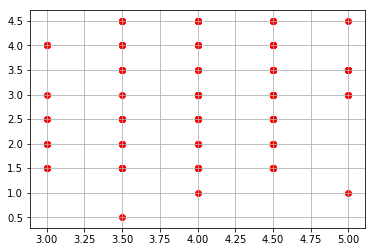

In [12]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"], c="r")
plt.grid()
plt.show()

In [13]:
# Continue with the second point.

In [14]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [16]:

movies = movies.sort_values(by="fm_diff", ascending=False)

print(movies.head())

                              FILM  RottenTomatoes  RottenTomatoes_User  \
3           Do You Believe? (2015)              18                   84   
47                    Annie (2014)              27                   61   
19                   Pixels (2015)              17                   54   
134        The Longest Ride (2015)              31                   73   
133  Paul Blart: Mall Cop 2 (2015)               5                   36   

     Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
3            22              4.7   5.4             5.0                   4.5   
47           33              4.8   5.2             4.5                   4.2   
19           27              5.3   5.6             4.5                   4.1   
134          33              4.8   7.2             4.5                   4.5   
133          13              2.4   4.3             3.5                   3.5   

     RT_norm  RT_user_norm   ...     RT_norm_round  RT_user_norm_rou

# Correlaciones.

In [17]:
from scipy.stats import pearsonr 

In [18]:
r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
r_value

0.17844919073895918


- Como podemos ver, el r_value que obtenemos de la correlacion entre "Fandango_Stars" y "Metacritic_norm_round" esta cerca de cero, lo que significa que ambas variables tienen una correlacion baja. Por el contrario si esta estuviera cerca de 1 tendrian una alta correlacion.

In [19]:
from scipy.stats import linregress

In [20]:
slope, intercept, r_value, p_value, stderr = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [21]:
r_value

0.17844919073895879


### Vamos a predecir que puntuacion tendiran los que votaron 3 en Metacritic a Fandango.

In [22]:
value_to_pred = 3
pred_3 = value_to_pred * slope + intercept
pred_3

4.0917071528212041

# Encontrando Residuos "Residuals"

#### Vamos a ver si ambas variable estan linealmente relacionadas o no.

In [23]:
pred_1 = 1*slope + intercept
pred_1

3.897084996873347

In [24]:
pred_5 = 5*slope + intercept
pred_5

4.2863293087690604

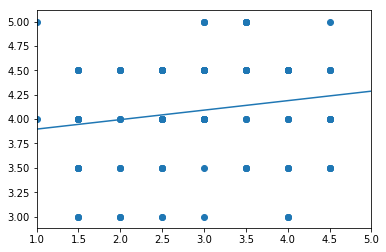

In [25]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim([1.0, 5.0])
plt.show()